<a href="https://colab.research.google.com/github/Souvik0651/Retail-Sales-Prediction/blob/main/Souvik_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
# importing numpy and pandas libraries
import pandas as pd
import numpy as np

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the csv file from drive
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project2- regeression/Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# top 5 rows of dataframe
df1.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# bottom 5 rows of dataframe
df1.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# reading another dataset from drive
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project2- regeression/Store.csv')

In [ ]:
# top 5 rows of dataframe
df2.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# bottom 5 rows of dataframe
df2.tail(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# checking statistics of df2 dataframe
df2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
# checking information of df2 dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# finding number of null values for df2 dataframe
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# replacing null values for df2
df2.PromoInterval=df2.PromoInterval.fillna(0)
df2.Promo2SinceYear =df2.Promo2SinceYear .fillna(0).astype('int64')
df2.Promo2SinceWeek =df2.Promo2SinceWeek .fillna(0).astype('int64')

In [ ]:
# rechecking df2 information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 87.2+ KB


In [ ]:
# finding the median
comp_dist_median=df2.CompetitionDistance.median()
comp_dist_median

2325.0

In [ ]:
# replacing the null values with median
df2['CompetitionDistance']=df2.CompetitionDistance.fillna(comp_dist_median)

In [ ]:
df2.CompetitionDistance=df2.CompetitionDistance.astype('int64')

In [ ]:
# value counts for CompetitionOpenSinceMonth
df2.CompetitionOpenSinceMonth.value_counts()

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [ ]:
# finding mode value for a categorical column
df2['CompetitionOpenSinceMonth']=df2.CompetitionOpenSinceMonth.fillna(int(df2.CompetitionOpenSinceMonth.mode()))

In [ ]:
# value count
df2.CompetitionOpenSinceYear.value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

In [ ]:
mode1=int(df2.CompetitionOpenSinceYear.mode())

In [ ]:
# finding the mode value
df2['CompetitionOpenSinceYear']=df2.CompetitionOpenSinceYear.fillna(mode1)

In [ ]:
df2.CompetitionOpenSinceYear.astype(int)

0       2008
1       2007
2       2006
3       2009
4       2015
        ... 
1110    2014
1111    2006
1112    2013
1113    2013
1114    2013
Name: CompetitionOpenSinceYear, Length: 1115, dtype: int64

In [ ]:
# finding sum of null value for columns in df2
df2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
#  finding sum of null value for columns in df1
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# information of columns for df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# information of columns for df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   int64  
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 87.2+ KB


In [ ]:
# value counts
df2.Promo2SinceYear.value_counts()

0       544
2011    128
2013    120
2014     95
2012     81
2009     73
2010     64
2015     10
Name: Promo2SinceYear, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   int64  
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 87.2+ KB


In [ ]:
df2.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
       2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961., 1995.,
       2001., 1990., 1994., 1900., 1998.])

In [ ]:
# joining two dataset using outer join
new_df1=df1.merge(df2, on= 'Store',how='outer')

In [ ]:
# shape
new_df1.shape

(1017209, 18)

In [ ]:
# information of new dataframe
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  int64  
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
new_df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9.0,2008.0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270,9.0,2008.0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270,9.0,2008.0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270,9.0,2008.0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270,9.0,2008.0,0,0,0,0


In [ ]:
# converting to datetime
new_df1['Date']= pd.to_datetime(new_df1.Date)

In [ ]:
new_df1['Year']=new_df1.Date.dt.year

In [ ]:
new_df1['Month']=new_df1.Date.dt.month
new_df1['Day']=new_df1.Date.dt.day
new_df1['month_weeks']=new_df1.Date.dt.week%4
new_df1['total_weeks']=new_df1.Date.dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
new_df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,month_weeks,total_weeks
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0,0,0,2015,7,31,3,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,0,0,0,2015,7,30,3,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,0,0,0,2015,7,29,3,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,0,0,0,2015,7,28,3,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,0,0,0,2015,7,27,3,31


In [ ]:
# importing seaborn and matplotlib lib
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

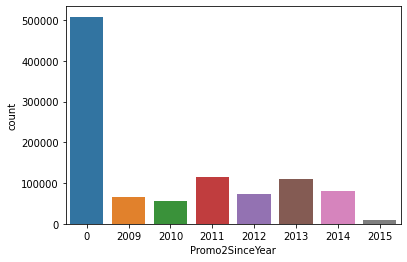

In [ ]:
# plotting count plot for promo2 sinceyear
sns.countplot(x='Promo2SinceYear',data= new_df1)

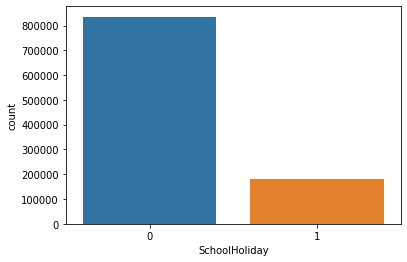

In [ ]:
# plotting count plot for SchoolHoliday
sns.countplot(x='SchoolHoliday', data= new_df1)

In [ ]:
# changing datatype to string
new_df1.StateHoliday=new_df1.StateHoliday.astype('str')

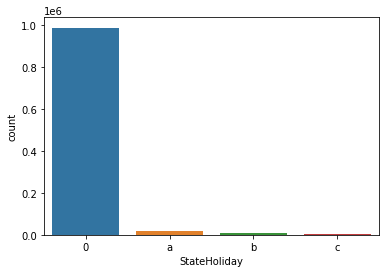

In [ ]:
# plotting count plot for StateHoliday
sns.countplot(x='StateHoliday', data= new_df1)

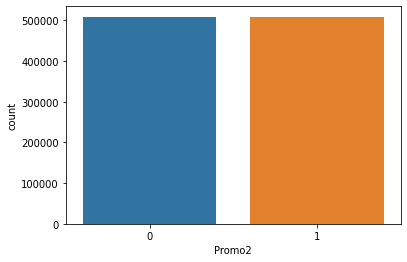

In [ ]:
# plotting count plot for promo2
sns.countplot(x='Promo2', data= new_df1)

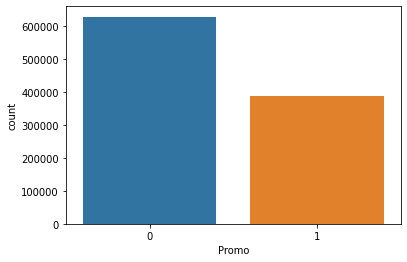

In [ ]:
# plotting count plot for promo
sns.countplot(x='Promo', data= new_df1)

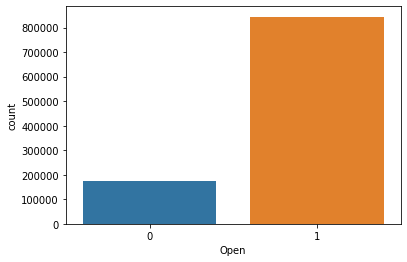

In [ ]:
# plotting count plot for open
sns.countplot(x='Open', data= new_df1)

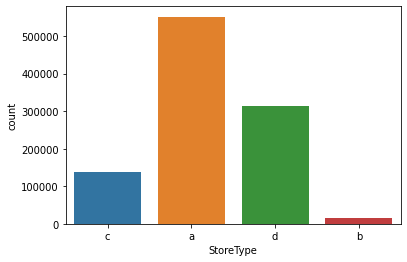

In [ ]:
# plotting count plot for storetype
sns.countplot(x='StoreType', data= new_df1)

In [ ]:
# statistical description of new df1
new_df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,month_weeks,total_weeks
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03,2.013832e+03,5.846762e+00,1.570279e+01,1.509300e+00,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03,7.773960e-01,3.326097e+00,8.787638e+00,1.113273e+00,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03,2.014000e+03,6.000000e+00,1.600000e+01,2.000000e+00,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03,2.014000e+03,8.000000e+00,2.300000e+01,3.000000e+00,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,2.015000e+03,1.200000e+01,3.100000e+01,3.000000e+00,5.200000e+01


### **Label Encording for categorical columns**

In [ ]:
# importing label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [ ]:
# calling label encoder
label_encoder=LabelEncoder()

In [ ]:
# transforming categorical column Store Type
new_df1.StoreType=label_encoder.fit_transform(new_df1.StoreType)

In [ ]:
# displaying datframe new_df1
new_df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,month_weeks,total_weeks
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,2008.0,0,0,0,0,2015,7,31,3,31
1,1,4,2015-07-30,5020,546,1,1,0,1,2,...,2008.0,0,0,0,0,2015,7,30,3,31
2,1,3,2015-07-29,4782,523,1,1,0,1,2,...,2008.0,0,0,0,0,2015,7,29,3,31
3,1,2,2015-07-28,5011,560,1,1,0,1,2,...,2008.0,0,0,0,0,2015,7,28,3,31
4,1,1,2015-07-27,6102,612,1,1,0,1,2,...,2008.0,0,0,0,0,2015,7,27,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,3,...,2013.0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,5,1,1
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,3,...,2013.0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,4,1,1
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,3,...,2013.0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,3,1,1
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,3,...,2013.0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,2,1,1


In [ ]:
# droping the date column
new_df1.drop('Date',axis='columns',inplace=True)

In [ ]:
# correlation of the dataframe
cor=new_df1.corr()

In [ ]:
cor

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,month_weeks,total_weeks
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.021604,-0.026451,-0.037472,-0.000224,0.008488,0.011053,0.008520,0.000290,0.001467,0.000023,-0.000030,0.001421
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,0.000051,-0.000025,0.000003,-0.000022,0.000168,0.000208,0.000168,0.001937,-0.005362,0.005136,-0.005027,-0.004880
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.013057,-0.018869,-0.023226,0.008740,-0.091040,-0.044143,-0.091056,0.023519,0.048768,-0.011612,0.039072,0.052946
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.141423,-0.102362,-0.024093,0.006541,-0.150159,-0.098323,-0.150138,-0.001212,0.038179,-0.004473,0.026667,0.041404
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,-0.003325,0.007987,0.001436,0.002557,-0.008309,-0.007436,-0.008308,-0.001009,-0.000681,0.033428,0.028511,0.004792
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,-0.000299,0.000140,-0.000008,0.000130,-0.000983,-0.001210,-0.000983,0.024300,-0.011747,-0.108325,0.065691,0.000572
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,0.000032,-0.003666,0.000124,0.001841,-0.006909,-0.006679,-0.006912,-0.036535,0.103282,0.030538,-0.033530,0.071052
StoreType,-0.021604,0.000051,-0.013057,-0.141423,-0.003325,-0.000299,0.000032,1.000000,0.077504,0.040474,0.043591,0.088922,0.059704,0.088865,-0.001514,-0.007692,-0.000109,0.000161,-0.007447
CompetitionDistance,-0.026451,-0.000025,-0.018869,-0.102362,0.007987,0.000140,-0.003666,0.077504,1.000000,-0.048941,0.020309,-0.139227,-0.122924,-0.139291,0.000710,0.003614,0.000049,-0.000076,0.003498
CompetitionOpenSinceMonth,-0.037472,0.000003,-0.023226,-0.024093,0.001436,-0.000008,0.000124,0.040474,-0.048941,1.000000,0.058298,0.021534,0.019623,0.021544,-0.000042,-0.000220,-0.000001,0.000005,-0.000212


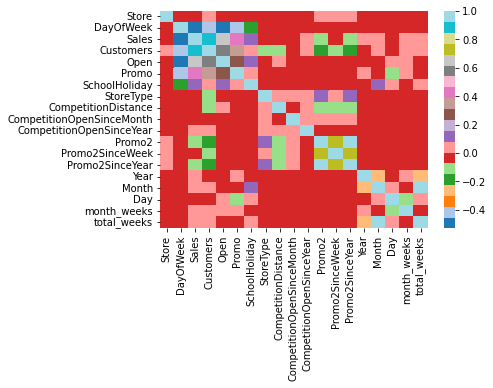

In [ ]:
# plotting heatmap for better understanding correlation between columns
sns.heatmap(data=cor,cmap='tab20')

In [ ]:
new_df1.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'month_weeks', 'total_weeks'],
      dtype='object')

In [ ]:
# dropping dayof week as it has lowest correlation with sales
new_df1=new_df1.drop('DayOfWeek',axis='columns')

In [ ]:
new_df1.columns

Index(['Store', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'month_weeks', 'total_weeks'],
      dtype='object')

In [ ]:
# label encoding
new_df1['Assortment']=label_encoder.fit_transform(new_df1['Assortment'])

In [ ]:
# dumming column promointerval values
dumm=pd.get_dummies(new_df1['PromoInterval'])
new_df2=pd.concat([dumm,new_df1],axis=1)
new_df2

,0,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec",Store,Sales,Customers,Open,Promo,StateHoliday,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,month_weeks,total_weeks
0,1,0,0,0,1,5263,555,1,1,0,...,2008.0,0,0,0,0,2015,7,31,3,31
1,1,0,0,0,1,5020,546,1,1,0,...,2008.0,0,0,0,0,2015,7,30,3,31
2,1,0,0,0,1,4782,523,1,1,0,...,2008.0,0,0,0,0,2015,7,29,3,31
3,1,0,0,0,1,5011,560,1,1,0,...,2008.0,0,0,0,0,2015,7,28,3,31
4,1,0,0,0,1,6102,612,1,1,0,...,2008.0,0,0,0,0,2015,7,27,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,0,1,1115,4771,339,1,0,0,...,2013.0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,5,1,1
1017205,0,0,0,1,1115,4540,326,1,0,0,...,2013.0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,4,1,1
1017206,0,0,0,1,1115,4297,300,1,0,0,...,2013.0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,3,1,1
1017207,0,0,0,1,1115,3697,305,1,0,0,...,2013.0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,2,1,1


In [ ]:
# dropping columns
new_df2.drop([0,'PromoInterval'],axis=1,inplace=True)
new_df2

,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec",Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,month_weeks,total_weeks
0,0,0,0,1,5263,555,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,31,3,31
1,0,0,0,1,5020,546,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,30,3,31
2,0,0,0,1,4782,523,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,29,3,31
3,0,0,0,1,5011,560,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,28,3,31
4,0,0,0,1,6102,612,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,27,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,1,1115,4771,339,1,0,0,1,...,9.0,2013.0,1,22,2012,2013,1,5,1,1
1017205,0,0,1,1115,4540,326,1,0,0,1,...,9.0,2013.0,1,22,2012,2013,1,4,1,1
1017206,0,0,1,1115,4297,300,1,0,0,1,...,9.0,2013.0,1,22,2012,2013,1,3,1,1
1017207,0,0,1,1115,3697,305,1,0,0,1,...,9.0,2013.0,1,22,2012,2013,1,2,1,1


In [ ]:
new_df2.CompetitionDistance.describe()

count    1.017209e+06
mean     5.422021e+03
std      7.706918e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.325000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [ ]:
new_df2.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [ ]:
new_df2.StateHoliday=label_encoder.fit_transform(new_df2.StateHoliday)

In [ ]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Feb,May,Aug,Nov            1017209 non-null  uint8  
 1   Jan,Apr,Jul,Oct            1017209 non-null  uint8  
 2   Mar,Jun,Sept,Dec           1017209 non-null  uint8  
 3   Store                      1017209 non-null  int64  
 4   Sales                      1017209 non-null  int64  
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  int64  
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  int64  
 11  Assortment                 1017209 non-null  int64  
 12  CompetitionDistance        1017209 non-null  int64  
 13  CompetitionO

In [ ]:
# shape new_df2
new_df2.shape

(1017209, 23)

In [ ]:
new_df2

,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec",Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,month_weeks,total_weeks
0,0,0,0,1,5263,555,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,31,3,31
1,0,0,0,1,5020,546,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,30,3,31
2,0,0,0,1,4782,523,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,29,3,31
3,0,0,0,1,5011,560,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,28,3,31
4,0,0,0,1,6102,612,1,1,0,1,...,9.0,2008.0,0,0,0,2015,7,27,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,1,1115,4771,339,1,0,0,1,...,9.0,2013.0,1,22,2012,2013,1,5,1,1
1017205,0,0,1,1115,4540,326,1,0,0,1,...,9.0,2013.0,1,22,2012,2013,1,4,1,1
1017206,0,0,1,1115,4297,300,1,0,0,1,...,9.0,2013.0,1,22,2012,2013,1,3,1,1
1017207,0,0,1,1115,3697,305,1,0,0,1,...,9.0,2013.0,1,22,2012,2013,1,2,1,1


In [ ]:
new_df2.columns

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec', 'Store',
       'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'month_weeks', 'total_weeks'],
      dtype='object')

In [ ]:
new_df2.describe()

,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec",Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,month_weeks,total_weeks
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,1.165896e-01,2.881630e-01,9.581119e-02,5.584297e+02,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01,...,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03,2.013832e+03,5.846762e+00,1.570279e+01,1.509300e+00,2.361551e+01
std,3.209308e-01,4.529076e-01,2.943323e-01,3.219087e+02,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01,...,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03,7.773960e-01,3.326097e+00,8.787638e+00,1.113273e+00,1.443338e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+02,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,5.580000e+02,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03,2.014000e+03,6.000000e+00,1.600000e+01,2.000000e+00,2.200000e+01
75%,0.000000e+00,1.000000e+00,0.000000e+00,8.380000e+02,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03,2.014000e+03,8.000000e+00,2.300000e+01,3.000000e+00,3.500000e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.115000e+03,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,...,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,2.015000e+03,1.200000e+01,3.100000e+01,3.000000e+00,5.200000e+01


In [ ]:
# using log for columns whinch have large values
new_df2['Customer_lg'] = new_df2['Customers'].map(lambda x : np.log(x) if x != 0 else 0)
new_df2['CompetitionDistance_lg'] = new_df2['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)


In [ ]:
new_df2.Promo2SinceYear.value_counts()

0       508031
2011    115056
2013    110464
2014     79922
2012     73174
2009     65270
2010     56240
2015      9052
Name: Promo2SinceYear, dtype: int64

In [ ]:
new_df2

,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec",Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,month_weeks,total_weeks,Customer_lg,CompetitionDistance_lg
0,0,0,0,1,5263,555,1,1,0,1,...,0,0,0,2015,7,31,3,31,6.318968,7.146772
1,0,0,0,1,5020,546,1,1,0,1,...,0,0,0,2015,7,30,3,31,6.302619,7.146772
2,0,0,0,1,4782,523,1,1,0,1,...,0,0,0,2015,7,29,3,31,6.259581,7.146772
3,0,0,0,1,5011,560,1,1,0,1,...,0,0,0,2015,7,28,3,31,6.327937,7.146772
4,0,0,0,1,6102,612,1,1,0,1,...,0,0,0,2015,7,27,3,31,6.416732,7.146772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,1,1115,4771,339,1,0,0,1,...,1,22,2012,2013,1,5,1,1,5.826000,8.584852
1017205,0,0,1,1115,4540,326,1,0,0,1,...,1,22,2012,2013,1,4,1,1,5.786897,8.584852
1017206,0,0,1,1115,4297,300,1,0,0,1,...,1,22,2012,2013,1,3,1,1,5.703782,8.584852
1017207,0,0,1,1115,3697,305,1,0,0,1,...,1,22,2012,2013,1,2,1,1,5.720312,8.584852


Text(0.5, 1.0, 'Customer')

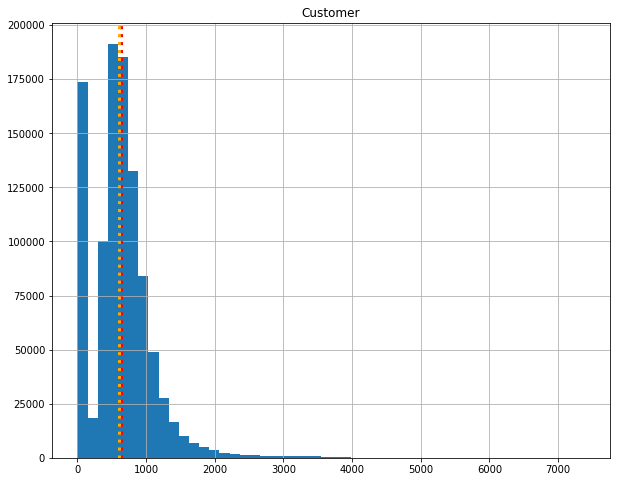

In [ ]:
# plotting histogram and checking mean and median
fig=plt.figure(figsize=(10,8))
ax=fig.gca()
new_df2.Customers.hist(bins=50,ax=ax)
ax.axvline(new_df2.Customers.mean(),color='r',ls= 'dotted',linewidth=3)

ax.axvline(new_df2.Customers.median(),color='orange',ls= 'dotted',linewidth=3)
plt.title('Customer')

Text(0.5, 1.0, 'Competiton Distance')

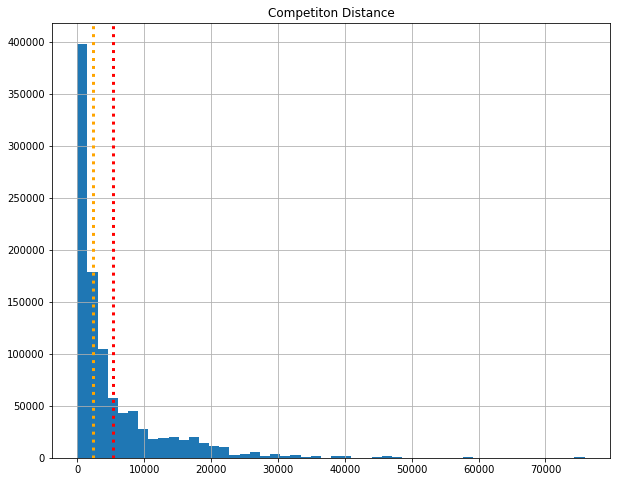

In [ ]:
# plotting histogram and checking mean and median
fig=plt.figure(figsize=(10,8))
ax=fig.gca()
new_df2.CompetitionDistance.hist(bins=50,ax=ax)
ax.axvline(new_df2.CompetitionDistance.mean(),color='r',ls= 'dotted',linewidth=3)

ax.axvline(new_df2.CompetitionDistance.median(),color='orange',ls= 'dotted',linewidth=3)
plt.title('Competiton Distance')

In [ ]:
new_df2.columns

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec', 'Store',
       'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'month_weeks', 'total_weeks', 'Customer_lg', 'CompetitionDistance_lg'],
      dtype='object')

In [ ]:
# droping columns
new_df2.drop(['Customers','CompetitionDistance','Store'],axis='columns',inplace=True)

In [ ]:
# dependent variable
y= new_df2['Sales']

In [ ]:
y

0          5263
1          5020
2          4782
3          5011
4          6102
           ... 
1017204    4771
1017205    4540
1017206    4297
1017207    3697
1017208       0
Name: Sales, Length: 1017209, dtype: int64